In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.stats import pearsonr

In [37]:
congress = pd.read_csv("./results/H118_dimensionality_reduction.csv")

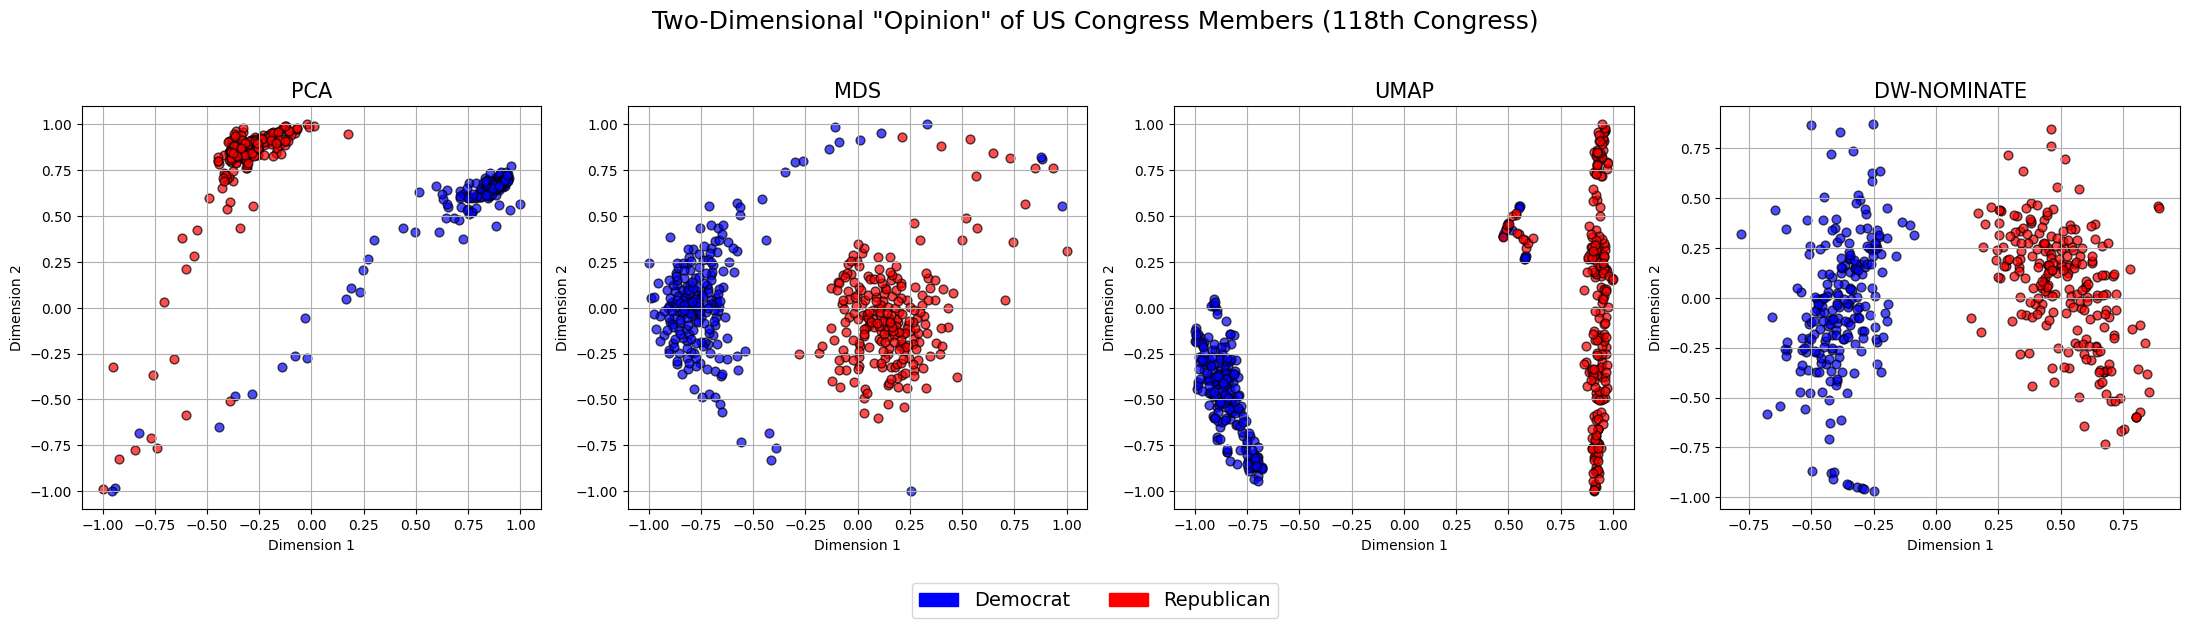

In [38]:
# Read the data
dim_reduction = pd.read_csv("./results/H118_dimensionality_reduction.csv")
members = pd.read_csv("./H118_members.csv")

# Merge the data on icpsr
merged_data = pd.merge(dim_reduction, members[['icpsr', 'nominate_dim1', 'nominate_dim2', 'party_code']], on='icpsr')


# Party mapping (adjust codes if needed)
party_labels = {100: 'Democrat', 200: 'Republican'}
party_colors = {100: 'blue', 200: 'red'}


# Assign party labels and colors
merged_data['party_label'] = merged_data['party_code'].map(party_map)
merged_data['party_color'] = merged_data['party_code'].map(party_colors)

fig, axes = plt.subplots(1, 4, figsize=(22, 6))
fig.suptitle('Two-Dimensional "Opinion" of US Congress Members (118th Congress)', fontsize=18)

def scale_data(data):
    return 2 * (data - data.min()) / (data.max() - data.min()) - 1

# Plotting function for each metric
def plot_metric(ax, x, y, title):
    for party, color in party_colors.items():
        mask = merged_data['party_code'] == party
        ax.scatter(x[mask], y[mask], c=color, label=party_map[party], alpha=0.7, edgecolor='k', s=40)
    ax.set_title(title, fontsize=15)
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')
    ax.grid(True)

plot_metric(axes[0], scale_data(merged_data['pca_1']), scale_data(merged_data['pca_2']), 'PCA')
plot_metric(axes[1], scale_data(merged_data['mds_1']), scale_data(merged_data['mds_2']), 'MDS')
plot_metric(axes[2], scale_data(merged_data['umap_1']), scale_data(merged_data['umap_2']), 'UMAP')
plot_metric(axes[3], merged_data['nominate_dim1'], merged_data['nominate_dim2'], 'DW-NOMINATE')

handles = [mpatches.Patch(color=party_colors[code], label=party_labels[code]) for code in party_labels]
# Custom legend

fig.legend(handles=handles, loc='lower center', ncol=2, fontsize=14, frameon=True, bbox_to_anchor=(0.5, -0.05))

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

In [39]:
merged_data

,icpsr,pca_1,pca_2,mds_1,mds_2,umap_1,umap_2,nominate_dim1,nominate_dim2,party_code,party_label,party_color
0,14854,-8.379020,4.268462,8.265337,9.873627,17.527573,6.244991,0.333,0.152,200,Republican,red
1,14863,-8.839408,4.809590,6.211575,-8.871478,17.530554,5.391531,0.180,-0.173,200,Republican,red
2,14873,15.424182,-2.757126,-22.179952,-4.539859,-2.356917,1.571652,-0.381,0.122,100,Democrat,blue
3,15029,13.697164,-1.110809,-13.532742,-5.672833,-0.871375,0.172850,-0.345,0.129,100,Democrat,blue
4,15433,15.237668,-0.950340,-19.922276,-3.061678,-2.596287,2.066003,-0.442,-0.331,100,Democrat,blue
...,...,...,...,...,...,...,...,...,...,...,...,...
446,22379,-24.100387,-31.639259,31.487040,31.334719,12.653673,4.815602,0.406,-0.082,200,Republican,red
447,22380,-25.838584,-32.746927,35.129777,29.338465,12.710076,4.898644,0.894,0.448,200,Republican,red
448,22381,-26.222813,-36.175073,36.185783,31.109179,12.726325,4.863630,-0.500,-0.209,100,Democrat,blue
449,22382,-26.615792,-36.526831,36.041523,31.564085,12.771424,4.932969,-0.331,-0.379,100,Democrat,blue


In [40]:
import numpy as np

# Calculate Pearson correlation for dimension 1
corr_pca = pearsonr(merged_data['nominate_dim1'], merged_data['pca_1'])[0]
corr_mds = pearsonr(merged_data['nominate_dim1'], merged_data['mds_1'])[0]
corr_umap = pearsonr(merged_data['nominate_dim1'], merged_data['umap_1'])[0]

print(f"Correlation between NOMINATE dim1 and PCA dim1: {corr_pca:.3f}")
print(f"Correlation between NOMINATE dim1 and MDS dim1: {corr_mds:.3f}")
print(f"Correlation between NOMINATE dim1 and UMAP dim1: {corr_umap:.3f}")

# Optionally, for dimension 2
corr_pca2 = pearsonr(merged_data['nominate_dim2'], merged_data['pca_2'])[0]
corr_mds2 = pearsonr(merged_data['nominate_dim2'], merged_data['mds_2'])[0]
corr_umap2 = pearsonr(merged_data['nominate_dim2'], merged_data['umap_2'])[0]

print(f"Correlation between NOMINATE dim2 and PCA dim2: {corr_pca2:.3f}")
print(f"Correlation between NOMINATE dim2 and MDS dim2: {corr_mds2:.3f}")
print(f"Correlation between NOMINATE dim2 and UMAP dim2: {corr_umap2:.3f}")

Correlation between NOMINATE dim1 and PCA dim1: -0.904
Correlation between NOMINATE dim1 and MDS dim1: 0.887
Correlation between NOMINATE dim1 and UMAP dim1: 0.918
Correlation between NOMINATE dim2 and PCA dim2: 0.028
Correlation between NOMINATE dim2 and MDS dim2: 0.133
Correlation between NOMINATE dim2 and UMAP dim2: 0.296
